### Manga Score Prediction

Various Machine Learning Models will be used to predict the score of manga out of 10 from various user metrics

#### Import Modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Merge manga data into one data frame

In [2]:
# files = [files for files in os.listdir('.Project_1_MyAnimeList/MyAnimeList_Web_Scraper/Manga Data/')] # list of file names 
# files = files[1:] #remove python checkpoints

# Data = pd.DataFrame() # empty data frame to merge all data into one


# #Now concatenate multiple files into one data frame
# for file in files:
#     df = pd.read_csv('.Python_Projects/My _Projects/Project_1_MyAnimeList/All_Manga_Data.csv' + file)
#     Data = pd.concat([Data,df])
    
# #Save Date frame in file
# #Manga_Data.to_csv('All_Manga_Data.csv',index = False)


In [3]:
df = pd.read_csv('./All_Manga_Data.csv')
Data = pd.DataFrame()
Data = pd.concat([Data,df])

#### Inspect Data Frame

In [4]:
Data.head()

,English,Type,Volumes,Chapters,Status,Published,Genres,Themes,Demographic,Serialization,Authors,Score,Ranked,Popularity,Members,Favorites,Demographics
0,Monster,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001",Award Winning Drama Mystery,Adult Cast Psychological,Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)",9.13,#5,#30,"197,898","17,278",NaN
1,Berserk,Manga,Unknown,Unknown,Publishing,"Aug 25, 1989 to ?",Action Adventure Award Winning Drama Fantasy H...,Gore Military Mythology Psychological,Seinen,Young Animal,"Miura, Kentarou (Story & Art), Studio Gaga (Art)",9.46,#1,#2,"565,512","106,420",NaN
2,20th Century Boys,Manga,22,249,Finished,"Sep 27, 1999 to Apr 24, 2006",Award Winning Drama Mystery Sci-Fi,Historical Psychological,Seinen,Big Comic Spirits,"Urasawa, Naoki (Story & Art)",8.95,#12,#29,"200,990","16,096",NaN
3,Yokohama Kaidashi Kikou,Manga,14,142,Finished,"Apr 25, 1994 to Feb 25, 2006",Award Winning Drama Sci-Fi Slice of Life,0,Seinen,Afternoon,"Ashinano, Hitoshi (Story & Art)",8.68,#51,#200,"63,658","4,599",NaN
4,0,Manga,Unknown,Unknown,Publishing,"Sep 27, 1989 to ?",Award Winning Sports,0,Shounen,Shounen Magazine (Weekly),"Morikawa, George (Story & Art)",8.69,#49,#171,"71,883","5,820",NaN


### Cleaning the data

#### Create a methods to clean the data :


In [5]:
class Clean:
    def __init__(self,DataFrame):
        self.DataFrame = DataFrame
    
    def DelDuplicates(self):
        '''Remove duplicate rows'''
        self.DataFrame = self.DataFrame.drop_duplicates(subset=None, keep='first',)
        
    def ConvertNaN(self):
        '''Turns 0 values to NaN'''
        self.DataFrame = self.DataFrame.replace('0',np.NaN)
        
        
    def ConvertNumeric(self,columns):
        '''Turns any string values to NaN , takes the columns name as an argument'''
        self.DataFrame[columns] = pd.to_numeric(self.DataFrame[columns],errors = 'coerce')
    
    def RemoveHashtag(self,column):
        'Remove Hashtag'
        self.DataFrame[column] = self.DataFrame[column].replace(to_replace='[#]' , value='', regex=True)
                
    def NaNtoMinusOne(self,column,fill):
        '''Convert all NaN Values to -1'''
        fill = str(fill + '-1')
        self.DataFrame[column] = self.DataFrame[column].fillna(fill)
             
    def MinusOnetoNan(self,column):
        '''Convert -1 to NaN'''
        self.DataFrame[column] = self.DataFrame[column].replace('-1', np.nan)
        
    def RemoveComma(self,column):
        self.DataFrame[column] = self.DataFrame[column].replace(to_replace='[,]' , value='', regex=True)
        
    def RemoveColumn(self,columns):
        self.DataFrame = self.DataFrame.drop(columns,axis = 1)
    

#### Turn Data to Class Object

In [6]:
Manga_Data = Clean(Data)

#### Drop Duplicates

In [7]:
Manga_Data.DelDuplicates()
Manga_Data.DataFrame.head()

,English,Type,Volumes,Chapters,Status,Published,Genres,Themes,Demographic,Serialization,Authors,Score,Ranked,Popularity,Members,Favorites,Demographics
0,Monster,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001",Award Winning Drama Mystery,Adult Cast Psychological,Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)",9.13,#5,#30,"197,898","17,278",NaN
1,Berserk,Manga,Unknown,Unknown,Publishing,"Aug 25, 1989 to ?",Action Adventure Award Winning Drama Fantasy H...,Gore Military Mythology Psychological,Seinen,Young Animal,"Miura, Kentarou (Story & Art), Studio Gaga (Art)",9.46,#1,#2,"565,512","106,420",NaN
2,20th Century Boys,Manga,22,249,Finished,"Sep 27, 1999 to Apr 24, 2006",Award Winning Drama Mystery Sci-Fi,Historical Psychological,Seinen,Big Comic Spirits,"Urasawa, Naoki (Story & Art)",8.95,#12,#29,"200,990","16,096",NaN
3,Yokohama Kaidashi Kikou,Manga,14,142,Finished,"Apr 25, 1994 to Feb 25, 2006",Award Winning Drama Sci-Fi Slice of Life,0,Seinen,Afternoon,"Ashinano, Hitoshi (Story & Art)",8.68,#51,#200,"63,658","4,599",NaN
4,0,Manga,Unknown,Unknown,Publishing,"Sep 27, 1989 to ?",Award Winning Sports,0,Shounen,Shounen Magazine (Weekly),"Morikawa, George (Story & Art)",8.69,#49,#171,"71,883","5,820",NaN


#### Removing non-numerical columns

In [8]:
dropcol = ['English', 'Type' ,'Status', 'Published', 'Genres', 'Themes', 'Demographic', 'Serialization', 'Authors','Demographics']
Manga_Data.RemoveColumn(dropcol)
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18,162,9.13,#5,#30,"197,898","17,278"
1,Unknown,Unknown,9.46,#1,#2,"565,512","106,420"
2,22,249,8.95,#12,#29,"200,990","16,096"
3,14,142,8.68,#51,#200,"63,658","4,599"
4,Unknown,Unknown,8.69,#49,#171,"71,883","5,820"


### Fixing Structural Errors

#### Convert 0 etc values to NaN
Lets first turn all 0 values into NaN to make it easier down the line

In [9]:
Manga_Data.ConvertNaN() 
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18,162,9.13,#5,#30,"197,898","17,278"
1,Unknown,Unknown,9.46,#1,#2,"565,512","106,420"
2,22,249,8.95,#12,#29,"200,990","16,096"
3,14,142,8.68,#51,#200,"63,658","4,599"
4,Unknown,Unknown,8.69,#49,#171,"71,883","5,820"


#### Volumes Scores and Chapters to numeric

You see by inspecting the data frame that there are non numeric values in the Chapter and Volumes.These values must be turned into NaN

In [10]:
Manga_Data.ConvertNumeric('Volumes')
Manga_Data.ConvertNumeric('Chapters')
Manga_Data.ConvertNumeric('Score')
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,#5,#30,"197,898","17,278"
1,NaN,NaN,9.46,#1,#2,"565,512","106,420"
2,22.0,249.0,8.95,#12,#29,"200,990","16,096"
3,14.0,142.0,8.68,#51,#200,"63,658","4,599"
4,NaN,NaN,8.69,#49,#171,"71,883","5,820"


### Cleaning the Ranked column

In [11]:
Manga_Data.DataFrame['Ranked'].isna().sum()

1089

The ranked column has alot of NaN values, to deal with the fact that the NaN values cannot be string sliced I will change the NaN values to '#-1' as a placeholder , do the slicing then convert all '-1' values back to NaN

#### Convert NaN to #-1

In [12]:
Manga_Data.NaNtoMinusOne('Ranked','#')

In [13]:
Manga_Data.DataFrame['Ranked'].isna().sum()

0

You can see that there is not NaN values so they have succesfully be converted to -1

#### Removing the hashtag then converting to numeric

In [14]:
Manga_Data.RemoveHashtag('Ranked')
Manga_Data.MinusOnetoNan('Ranked')
Manga_Data.ConvertNumeric('Ranked')
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,5.0,#30,"197,898","17,278"
1,NaN,NaN,9.46,1.0,#2,"565,512","106,420"
2,22.0,249.0,8.95,12.0,#29,"200,990","16,096"
3,14.0,142.0,8.68,51.0,#200,"63,658","4,599"
4,NaN,NaN,8.69,49.0,#171,"71,883","5,820"


#### Removing the Hashtag for the Popularity column

In [15]:
Manga_Data.NaNtoMinusOne('Popularity','#')
Manga_Data.RemoveHashtag('Popularity')
Manga_Data.MinusOnetoNan('Popularity')
Manga_Data.ConvertNumeric('Popularity')
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,5.0,30,"197,898","17,278"
1,NaN,NaN,9.46,1.0,2,"565,512","106,420"
2,22.0,249.0,8.95,12.0,29,"200,990","16,096"
3,14.0,142.0,8.68,51.0,200,"63,658","4,599"
4,NaN,NaN,8.69,49.0,171,"71,883","5,820"


#### Removing commas for Members


In [16]:
Manga_Data.NaNtoMinusOne('Members',',')
Manga_Data.RemoveComma('Members')
Manga_Data.MinusOnetoNan('Members')
Manga_Data.ConvertNumeric('Members')
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,5.0,30,197898,"17,278"
1,NaN,NaN,9.46,1.0,2,565512,"106,420"
2,22.0,249.0,8.95,12.0,29,200990,"16,096"
3,14.0,142.0,8.68,51.0,200,63658,"4,599"
4,NaN,NaN,8.69,49.0,171,71883,"5,820"


#### Removing commas for Favorites

In [17]:
Manga_Data.NaNtoMinusOne('Favorites',',')
Manga_Data.RemoveComma('Favorites')
Manga_Data.MinusOnetoNan('Favorites')
Manga_Data.ConvertNumeric('Favorites')
Manga_Data.DataFrame.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,5.0,30,197898,17278.0
1,NaN,NaN,9.46,1.0,2,565512,106420.0
2,22.0,249.0,8.95,12.0,29,200990,16096.0
3,14.0,142.0,8.68,51.0,200,63658,4599.0
4,NaN,NaN,8.69,49.0,171,71883,5820.0


#### Convert Certain Columns to int

In [18]:
columns = {'Volumes': int,'Chapters': int,'Ranked': int,'Score': float ,'Popularity': int,'Members': int,'Favorites': int}
Manga_Data = Manga_Data.DataFrame.astype(columns,errors = 'ignore')

In [19]:
Manga_Data.head()

,Volumes,Chapters,Score,Ranked,Popularity,Members,Favorites
0,18.0,162.0,9.13,5.0,30,197898,17278.0
1,NaN,NaN,9.46,1.0,2,565512,106420.0
2,22.0,249.0,8.95,12.0,29,200990,16096.0
3,14.0,142.0,8.68,51.0,200,63658,4599.0
4,NaN,NaN,8.69,49.0,171,71883,5820.0


#### Analysis

Lets first inspect the data through histograms and scatter diagrams

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAD20081F0>,
      dtype=object)

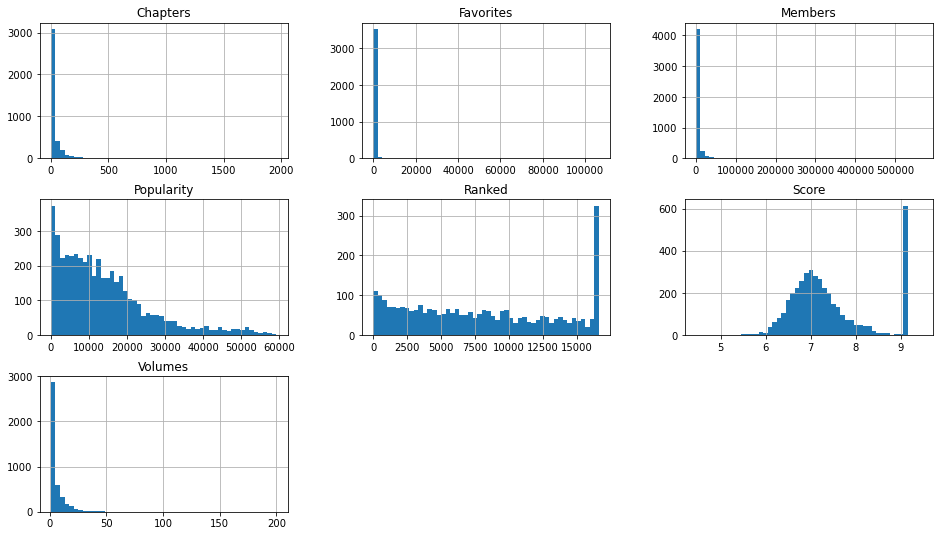

In [20]:
Manga_Data.hist(bins = 50,figsize = (16,9))

This data is has alot of outliers so will be standardised in the pipeline later

#### Looking at Correlations

In [21]:
corr_matrix = Manga_Data.corr()
corr_matrix['Score'].sort_values(ascending=False)

Score         1.000000
Popularity    0.224244
Chapters      0.208302
Volumes       0.194518
Members       0.194367
Favorites     0.186521
Ranked       -0.947498
Name: Score, dtype: float64

The most promising attributes with correlation are the Ranking data and the score data which have a strong negative linear correlation, lets look more in depth at the data by doing a scatter plots

#### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAD2A7F550>,
      dtype=object)

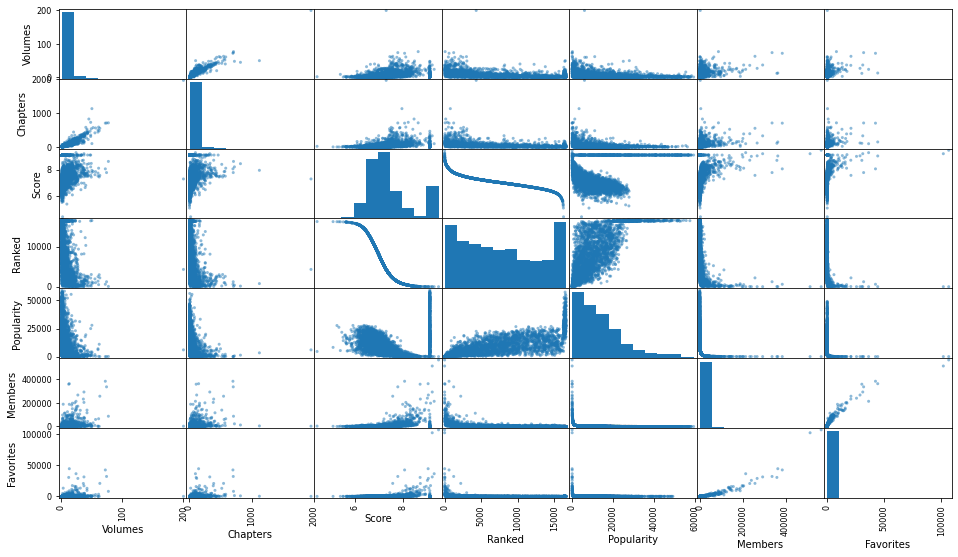

In [22]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(Manga_Data, figsize=(16,9))


The Score and Ranked data seem to have a strict trend

Text(0, 0.5, 'Score')

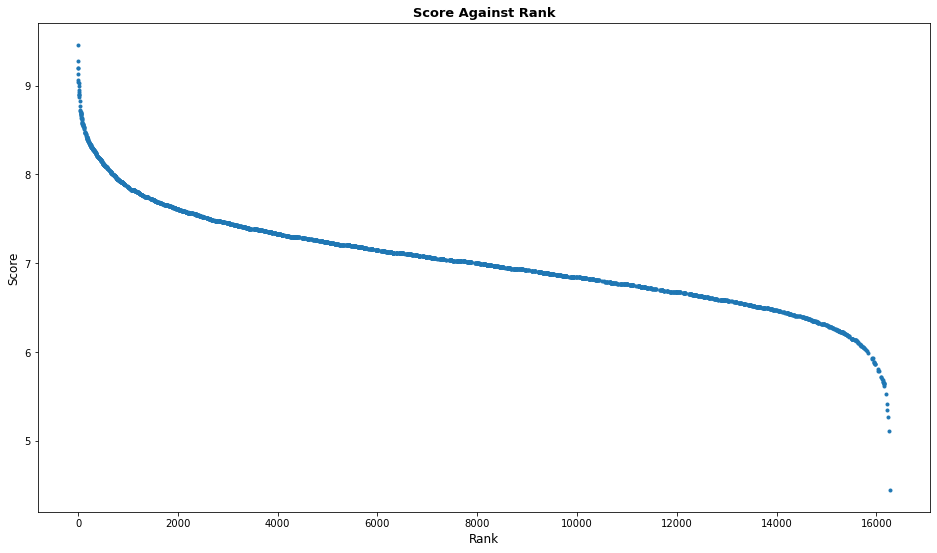

In [23]:
plt.figure(figsize = (16,9))
plt.plot(Manga_Data['Ranked'],Manga_Data['Score'],'.')
plt.title('Score Against Rank',fontsize = 13,fontweight = 'bold')
plt.xlabel('Rank',fontsize = 12)
plt.ylabel('Score',fontsize = 12)

After doing more research on the way the attributes are created the Rank of the Manga is calculated using the score , this will not give an accurate model as the model will assume that the score has to be estimated with the other features of the model providing there is not a clear relationship.The Ranked column must be removed

#### Remove the Ranked Column


In [24]:
Manga_Data = Manga_Data.drop('Ranked',axis = 1)
Manga_Data.head()

,Volumes,Chapters,Score,Popularity,Members,Favorites
0,18.0,162.0,9.13,30,197898,17278.0
1,NaN,NaN,9.46,2,565512,106420.0
2,22.0,249.0,8.95,29,200990,16096.0
3,14.0,142.0,8.68,200,63658,4599.0
4,NaN,NaN,8.69,171,71883,5820.0


#### Now to do the test train split:
The test train split cant be imputed at the same time and must be done seperately to prevent data leakage

In [25]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(Manga_Data,test_size = 0.2,random_state = 42)

#### Now split into labeled and unlabeled data

In [26]:
### Train Set ###
train_set_labels = train_set['Score']
train_set_data = train_set.drop('Score', axis = 1)

### Test Set ###
test_set_labels = test_set['Score']
test_set_data = test_set.drop('Score',axis = 1)

### Transformation Pipeline
As there are going to be a couple transformations on the data it is easier to use a transformation pipline

The data must have a chapters per volume attribute , the data must be imputed using KNN impute for missing values and the data will be scaled using Standard Scaler

#### Combine attributes

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
chapter_ix = 1
volumes_ix = 0

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        Chapters_per_Volume = X[:, chapter_ix] / X[:, volumes_ix]
        
        return np.c_[X, Chapters_per_Volume]

#### Create Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [29]:
pipe = Pipeline([('knn_imputer',KNNImputer(missing_values = np.nan,n_neighbors = 5)),
                          ('attribs_Adder',CombinedAttributesAdder()),
                          ('std_scaler',StandardScaler()),])

manga_data_prepared_tr = pipe.fit_transform(train_set_data)

#### Impute Score Data
There is no need to use std_scaler as the data has a range of 1 to 10

In [30]:
train_set_labels = train_set_labels.values
train_set_labels= train_set_labels.reshape(-1, 1) #make 2d array


score_imputer = KNNImputer(missing_values = np.nan,n_neighbors=5,) #KNN IMPUTE

manga_labels_prepared_tr = score_imputer.fit_transform(train_set_labels)


#### Show the prepared data in a data frame

In [31]:
col = ['Volumes','Chapters','Popularity','Members','Favorites','Chapter Per Volume']

train_set_data_prepared = manga_data_prepared_tr #train set prepared
train_set_data_df = pd.DataFrame(manga_data_prepared_tr,columns = col) #dataframe

train_set_labels = manga_labels_prepared_tr #train set labels prepared
train_set_labels_df = pd.DataFrame(manga_labels_prepared_tr, columns=['Score']) #data frame of lables


#### Select and Train a model

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_data_prepared, train_set_labels)

LinearRegression()

#### Lets test the model on the first five training data instances

In [33]:
training_test = train_set_data_prepared[:5]

In [34]:
training_test_labels = train_set_labels[:5]

In [35]:
print(f'Predictions: {lin_reg.predict(training_test)}' )
print(f'Labels : {training_test_labels}')

Predictions: [[7.25470379]
 [7.8786575 ]
 [7.12931454]
 [7.40652029]
 [7.44079646]]
Labels : [[7.6       ]
 [7.38231301]
 [6.88      ]
 [8.13      ]
 [6.72      ]]


#### Measure RMSE:

In [36]:
from sklearn.metrics import mean_squared_error
manga_score_predictions = lin_reg.predict(train_set_data_prepared)

lin_mse = mean_squared_error(manga_score_predictions,train_set_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.755275693572306

The model is quite accurate using linear regression , this could be due to overfitting which will be checked

#### Evaluating the Linear Regression using Cross_Validation

In [37]:
def display_score(scores):
    print('Scores:' ,score)
    print('Mean:' ,scores.mean())
    print('Standard Dev:',scores.std())

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
score = cross_val_score(lin_reg,train_set_data_prepared,train_set_labels,scoring ='neg_mean_squared_error',cv =10)
lin_reg_rmse_score = np.sqrt(-score)
display_score(lin_reg_rmse_score)

Scores: [-0.54237028 -0.5482061  -0.63640556 -0.6317552  -0.59552897 -0.57188602
 -0.52777666 -0.6550782  -0.53718366 -0.51769031]
Mean: 0.7585671177725538
Standard Dev: 0.031048733605146126


#### Trying a Decision Tree model

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_data_prepared,train_set_labels)

DecisionTreeRegressor()

#### Measuring RMSE

In [41]:
tree_score_predictions = tree_reg.predict(train_set_data_prepared)
tree_MSE = mean_squared_error(train_set_labels,tree_score_predictions)
tree_RMSE = np.sqrt(tree_MSE)
tree_RMSE

3.2274635256934564e-16

The error is very small so the model has overfit the data

#### Evaluating the decision tree using Cross_Validation

In [42]:
score = cross_val_score(tree_reg,train_set_data_prepared,train_set_labels,scoring = 'neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-score)

In [43]:
display_score(tree_rmse_scores)

Scores: [-1.0771255  -0.99960663 -1.18030322 -0.9770619  -0.94854559 -1.03510384
 -0.82903609 -1.14842056 -0.85828127 -0.92521288]
Mean: 0.9974338085771283
Standard Dev: 0.05473155815881296


The RMSE is lower on the linear regression model , both models are very accurate . Overfitting must be investigated

### Evaluating Linear Regression model on the test set

#### Run Test Data through the Pipeline

In [44]:
#### Run Pipeline ####
test_set_labels = test_set_labels.values
test_set_labels=test_set_labels.reshape(-1, 1) #make 2d array

manga_labels_prepared_test = score_imputer.fit_transform(test_set_labels)
manga_data_prepared_test = pipe.fit_transform(test_set_data)

#### Predict using Lin Reg model ####
label_predictions_test = lin_reg.predict(manga_data_prepared_test)


#### Measuring the RMSE

In [46]:
final_mse = mean_squared_error(label_predictions_test,manga_labels_prepared_test)
final_RMSE = np.sqrt(final_mse)

#### The Final RMSE was calculated to be:

In [47]:
final_RMSE

0.7776908124349354